In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# For saving the images we crated
import os
pro_dir = "."
project_id = "Heart-diseases"
image_path = os.path.join(pro_dir,"images",project_id)
def save_image(fig_id,tight_layout=True, fig_extension = "png",fig_dimension = 300):
    os.makedirs(image_path,exist_ok = True)
    fig_path = os.path.join(image_path,fig_id + "." + fig_extension)
    print("saving...",fig_id)
    if tight_layout:
        plt.tight_layout()
        plt.savefig(fig_path,dpi=fig_dimension)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# STEP 1: Data Cleaning and Formatting

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
# Display top of dataframe
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Types

In [4]:
# Display the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


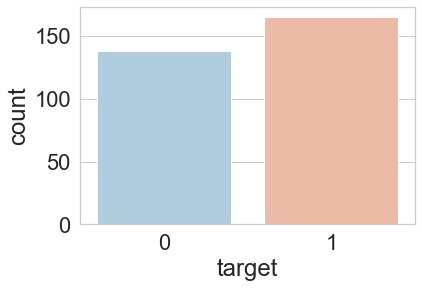

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=data,palette='RdBu_r')

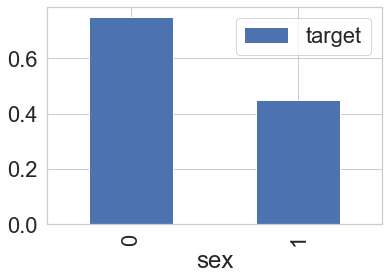

In [7]:
sex_pivot = data.pivot_table(index = "sex",values = "target")
sex_pivot.plot.bar()
plt.show()

In [8]:
data['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [9]:
def process_age(df,cut_points,label_names):
    df["age"] = df["age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["age"],cut_points,labels = label_names)
    return df

cut_points = [29,39,49,59,69,79];
label_names = ["29-39","39-49",'49-59','59-69','69-79']

data= process_age(data,cut_points,label_names)

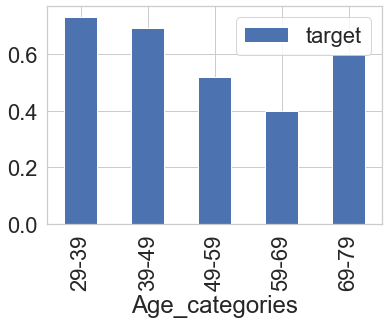

In [10]:
Age_catergories = data.pivot_table(index="Age_categories",values="target")
Age_catergories.plot.bar()
plt.show()

In [11]:
brand = data.dropna(subset =["target"])
brand = data['sex'].value_counts()
brand =list(brand.index)

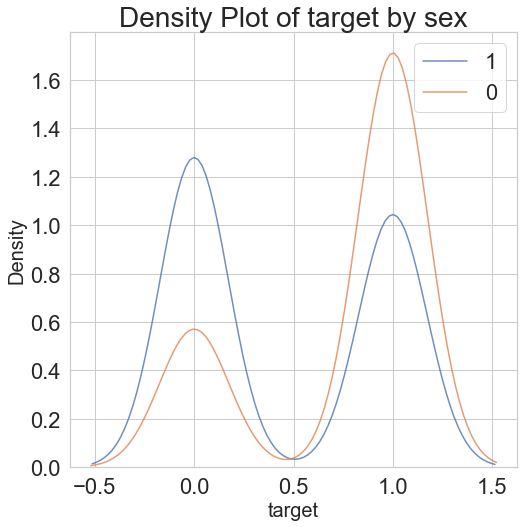

In [12]:
# Plot of distribution of mpg for manufacturer
figsize(8,8)

# Plot each manufacturer
for c_brand in brand:
    # Select the manufacturer
    subset = data[data['sex'] == c_brand]
    
    # Density plot of mpg
    sns.kdeplot(subset['target'].dropna(),
               label = c_brand, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('target', size = 20)
plt.ylabel('Density', size = 20) 
plt.title('Density Plot of target by sex', size = 28)
plt.show()

# Correlation between our features and targets

To check the correlation we will use pearson correlation coefficient. the code below will show the correlation coefficient between the target and variables. This will only check correlation between integer and float values not categorical!

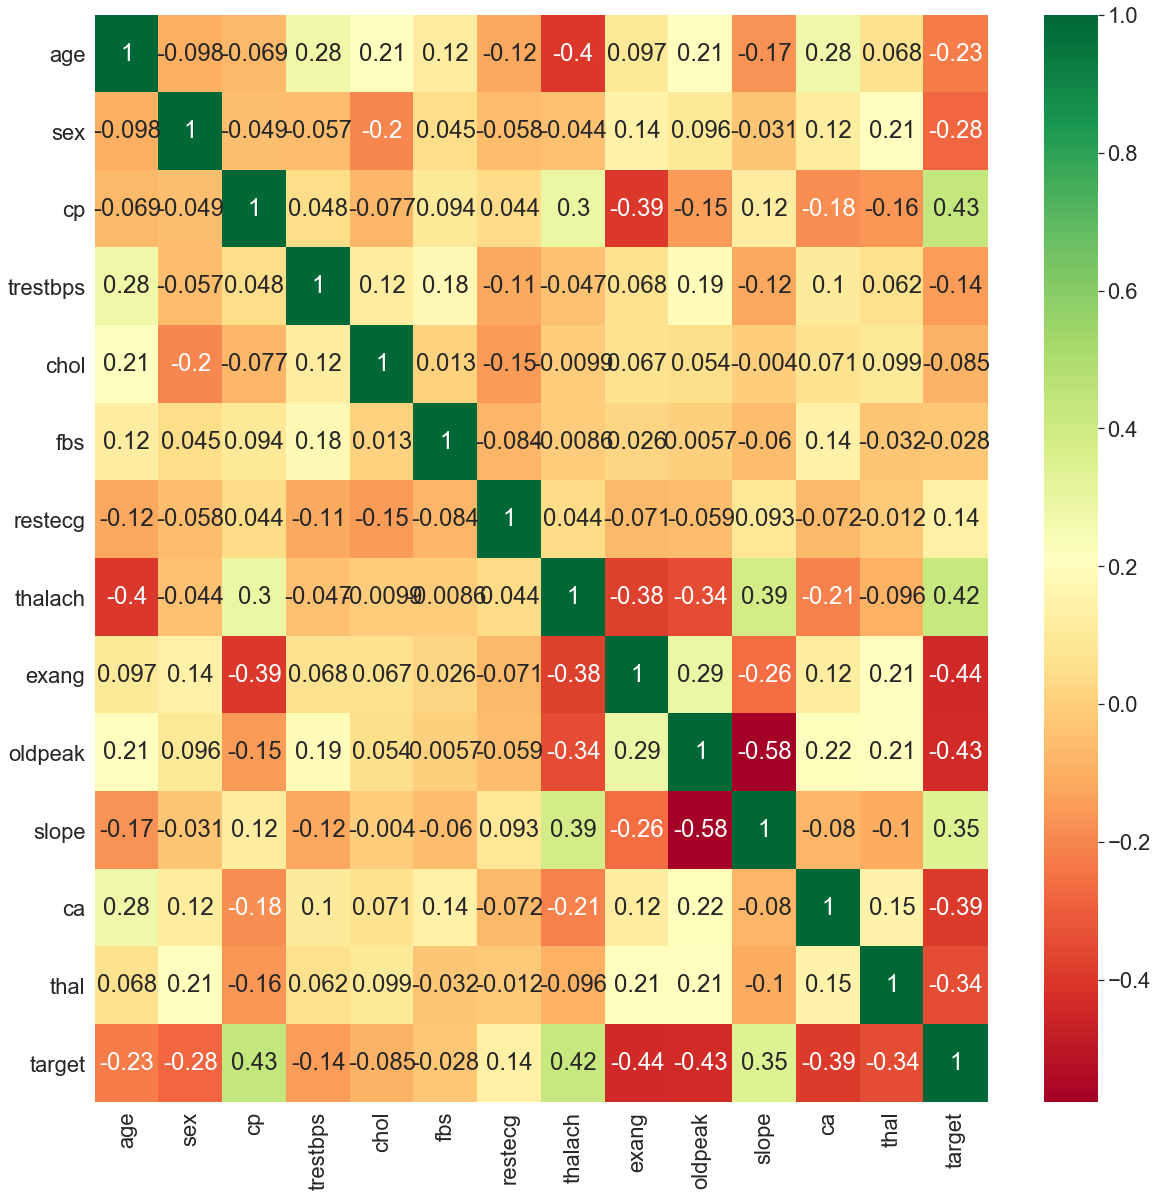

In [13]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
correlations = data.corr()['target'].dropna().sort_values()
print(correlations)

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271835DF388>,
      dtype=object)

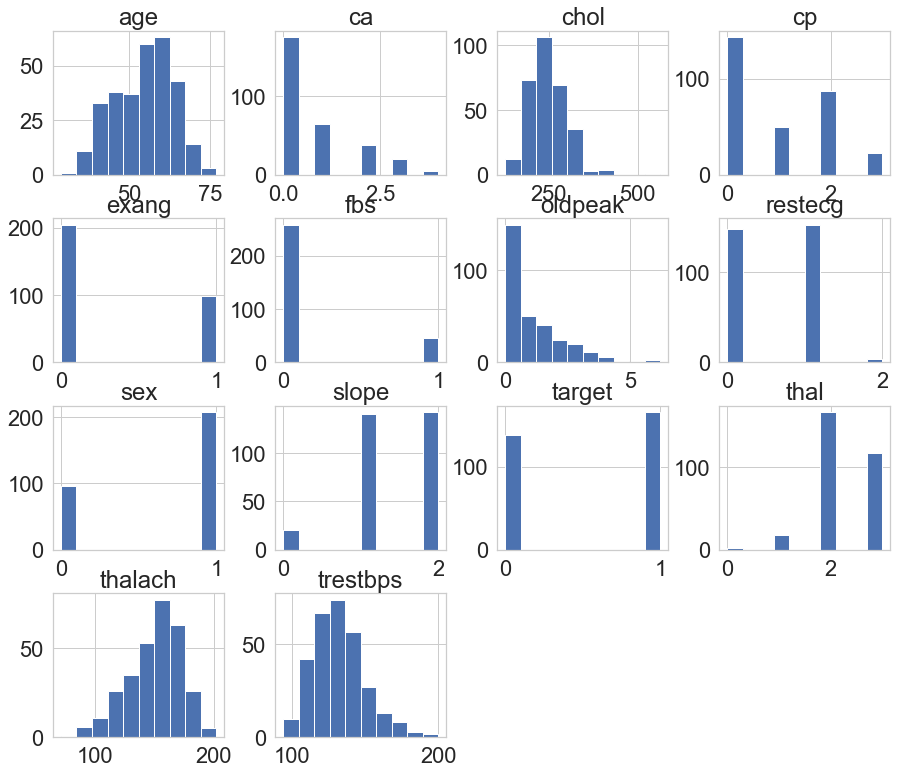

In [15]:
figsize(15,13)
data.hist()

In [16]:
dataset = pd.get_dummies(data, columns = ['Age_categories','sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

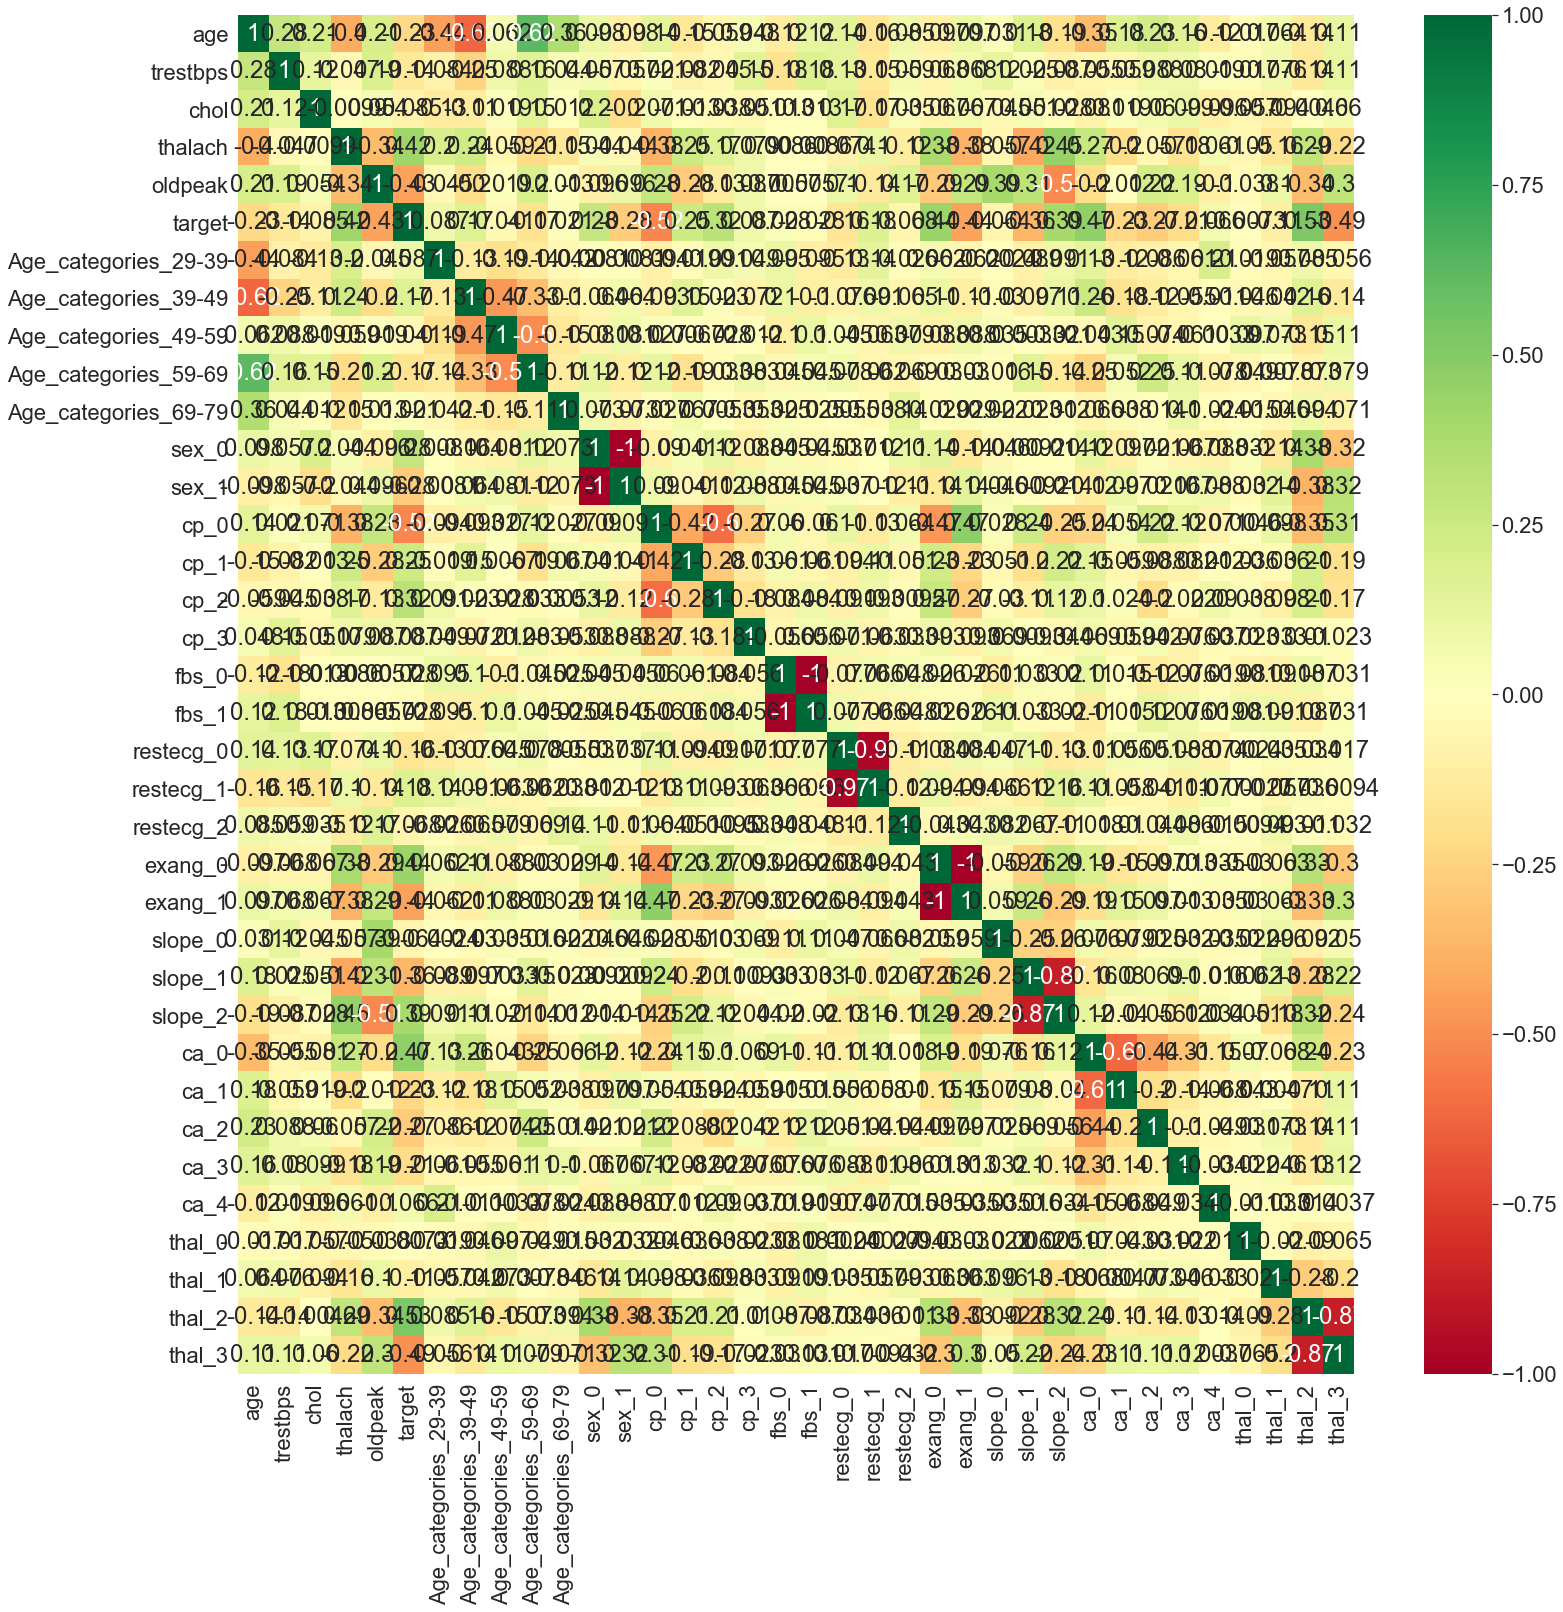

In [17]:
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
correlations = dataset.corr()['target'].dropna().sort_values()
print(correlations)

cp_0                   -0.516015
thal_3                 -0.486112
exang_1                -0.436757
oldpeak                -0.430696
slope_1                -0.362053
sex_1                  -0.280937
ca_2                   -0.273998
ca_1                   -0.232412
age                    -0.225439
ca_3                   -0.210615
Age_categories_59-69   -0.173854
restecg_0              -0.159775
trestbps               -0.144931
thal_1                 -0.106589
chol                   -0.085239
restecg_2              -0.068410
slope_0                -0.063554
Age_categories_49-59   -0.041318
fbs_1                  -0.028046
thal_0                 -0.007293
Age_categories_69-79    0.020568
fbs_0                   0.028046
ca_4                    0.066441
Age_categories_29-39    0.086510
cp_3                    0.086957
Age_categories_39-49    0.168033
restecg_1               0.175322
cp_1                    0.245879
sex_0                   0.280937
cp_2                    0.316742
slope_2   

## Two variable plots

In order to visualize the relationship between two variables, we use a scatterplot. We can also include additional variables using aspects such as color of the markers or size of the markers. Here we will plot two numeric variables against one another and use color to represent a third categorical variable.

In [20]:
print(dataset.head())

   age  trestbps  chol  thalach  oldpeak  target  Age_categories_29-39  \
0   63       145   233      150      2.3       1                     0   
1   37       130   250      187      3.5       1                     1   
2   41       130   204      172      1.4       1                     0   
3   56       120   236      178      0.8       1                     0   
4   57       120   354      163      0.6       1                     0   

   Age_categories_39-49  Age_categories_49-59  Age_categories_59-69  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4                     0                     1                     0   

   Age_categories_69-79  sex_0  sex_1  cp_0  cp_1  cp_2  cp_3  fbs_0  fbs_1  \
0                     0      0      1     0     0

# Split Into Training and Testing Sets

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

columns_to_scale = ['trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [22]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,Age_categories_29-39,Age_categories_39-49,Age_categories_49-59,Age_categories_59-69,Age_categories_69-79,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,0.763956,-0.256334,0.015443,1.087338,1,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,-0.092738,0.072199,1.633471,2.122573,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,-0.092738,-0.816773,0.977514,0.310912,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,-0.663867,-0.198357,1.239897,-0.206705,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,-0.663867,2.082050,0.583939,-0.379244,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [23]:
y = dataset['target']
X = dataset.drop(['target','age'], axis = 1)
print(X.shape)
print(y.shape)

(303, 34)
(303,)


In [24]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

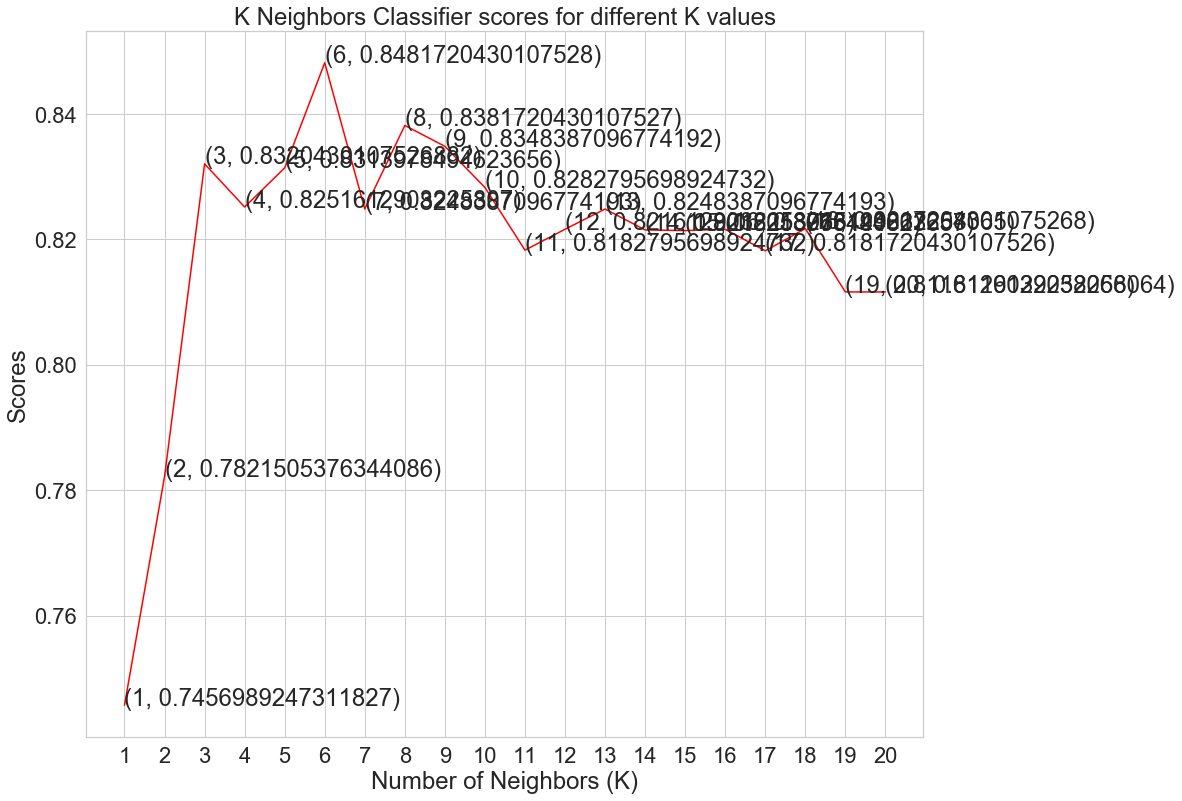

In [25]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [26]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [27]:
score.mean()

0.8216129032258065

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [30]:
score.mean()

0.8282795698924732

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(knn,X,y,cv=10)
print(score.mean())

0.8313978494623656


In [32]:
decisiontree_classifier = DecisionTreeClassifier(random_state=42)
score = cross_val_score(decisiontree_classifier,X,y,cv=10)
print(score.mean())

0.7288172043010752


In [35]:
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

In [36]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
score = cross_val_score(clf,X,y,cv=10)
print(score.mean())

0.784731182795699


In [37]:
xgb = XGBClassifier(objective='reg:squarederror')
score = cross_val_score(xgb,X,y,cv=10)
print(score.mean())

0.8245161290322581
